<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:5px 10px;">Customer Segmentation:  Leveraging Customer Clusters for Strategic Business Decision</p>

## Introduction

 Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster.The goal of this clustering initiative is to streamline targeted marketing effort  and ensure a more personalized approach in reaching out to different customer segments through the application of clustering algorithm. The aims is to identify customer segments that will guide strategic decisions making and the impact of each segment to the business success.

I invite you to explore the pages ahead and witness how data transforms into knowledge, empowering strategic decision-making in the dynamic realm of marketing.


## Background 

 In preparation for an upcoming year-end sale, a major retail store seeks to enhance its promotional strategy by leveraging customer segmentation through clustering. The objective is to group customers based on their purchasing behavior and characteristics. 


 ## Objectives
 
__The main objective is to cluster customer to different segment.__



To achieve the objective of project the steps highlighted below will be used:
1. [Dataset description](#1)
2. [Importing Libraries](#2)
3. [Loading dataset and Dataset Overview](#3)
4. [Data Cleaning](#4)
5. [Data Exploration](#5)
6. [Data Preparation and Preprocessing](#6)
7. [Model Building and Evalution](#7)
8. [Cluster Analysis](#8)
9. [Conclusion and Inferences](#9)

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:5px 10px;">Dataset Description</p>

The dataset used in this project is a kaggle dataset available in ths [link](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset). The data contain interesting features about customers who purchase differnrt product from a retail superstore over a campain period.

Data feature description is as follows;\n

- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **ID** - Unique ID of each customer
- **Year_Birth** - year birth of the customer
- **Complain** - 1 if the customer complained in the last 2 years
- **Dt_Customer** - date of customer's enrollment with the company
- **Education** - customer's level of education
- **Marital** - customer's marital status
- **Kidhome** - number of small children in customer's household
- **Teenhome** - number of teenagers in customer's household
- **Income** - customer's yearly household income
- **MntFishProducts** - the amount spent on fish products in the last 2 years
- **MntMeatProducts** - the amount spent on meat products in the last 2 years
- **MntFruits** - the amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - the amount spent on wine products in the last 2 years
- **MntGoldProds** - the amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalog (buying goods to be shipped through the mail)
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through the company's website
- **NumWebVisitsMonth** - number of visits to company's website in the last month
- **Recency** - number of days since the last purchase

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 10px;">Importing Libaries and Loading Dataset</p>
At the initial stage i will import libraries that will get us started, other useful libraries will be imported as we flow along we the analysis. If you do not have any of the libraries mention in any part of the project, you can easily install by use !pip install [library name]

In [1]:
## importing libraries for data manipulation and numerical analysis
import pandas as pd   
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

__Loading dataset from file directory and dataset Overview__

In [2]:
# the name of the dataset is "superstore_data.csv" which is located in the directory of the analysis notebook
data = pd.read_csv('superstore_data.csv')

In [3]:
# check first five rows of dataset
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
# last five rows
data.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


In [5]:
#set to display max-column
pd.set_option('display.max_columns', None)

In [6]:
# check dataset dimension
data.shape

(2240, 22)

In [7]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns ")

The dataset contains 2240 rows and 22 columns 


In [8]:
#columns in the dataset
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [9]:
# daset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset consist of 3 data types (float64(1), int64(18), object(3)). some columns are not in their correct data type,while other columns such as the Customer ID, date of customer enrolment(Dt_Customer ) are not. we will convert them to their right data type in the data cleaning steps 

In [10]:
# check for duplicates
data.duplicated().sum()

0

There are no duplicates in the dataset

In [11]:
## check for null
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Income columns has missing values, the number of missing value is small compare to the number of records in the dataset. LEt proceed by checking some of the unique values in the columns of the dataframe

In [12]:
categorical = ['Education', 'Marital_Status',]
for col in categorical:
    print(col)
    print(data[col].unique())
    print('_' * 50)

Education
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
__________________________________________________
Marital_Status
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
__________________________________________________


<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Cleaning</p>
In the previous steps we identify some inconsistencies in the data, let address them.

**Handling missing Values**

 The percentage of missing value is small, here i have decided to  Drop missing values in the income columns

In [13]:
data.dropna(inplace = True)

In [14]:
data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

**Data type conversion**:-
here i will convert the customer enrolment date to __Datetime__.

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [16]:
data.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

In [17]:
## here i make a copy of the dataframe for analysis, this will help us to come back in case we need to reload the dataset
df = data.copy()

**Statistical Summary**

In [18]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907


The statistical summary of the numerical columns first give us insight into customer Income, Average income of customer 	is $52K, and customers are spending more on wine product, follow by meat.There is more purchase from store than web and catalogue purchases.

### Customer Income Distibution

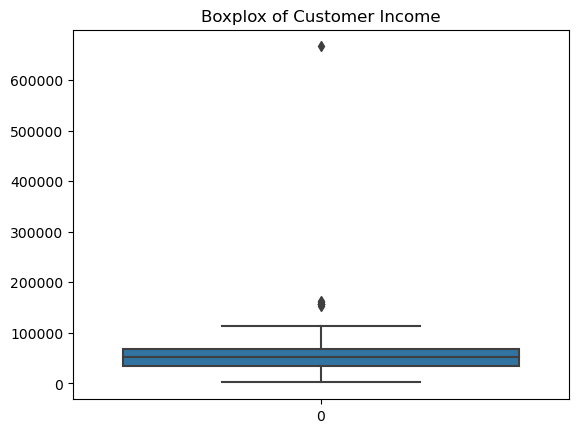

In [19]:
plt.title('Boxplox of Customer Income')
sns.boxplot(data['Income']);

As we can see, customer earn between 0 - 2O0K dollars.  There is one outlier , we will remove this datapoint 

### Customer Response to campain

In [20]:
label = (round(df['Response'].value_counts(normalize = True),2)*100).astype('str')+'%'
label

Response
0    85.0%
1    15.0%
Name: proportion, dtype: object

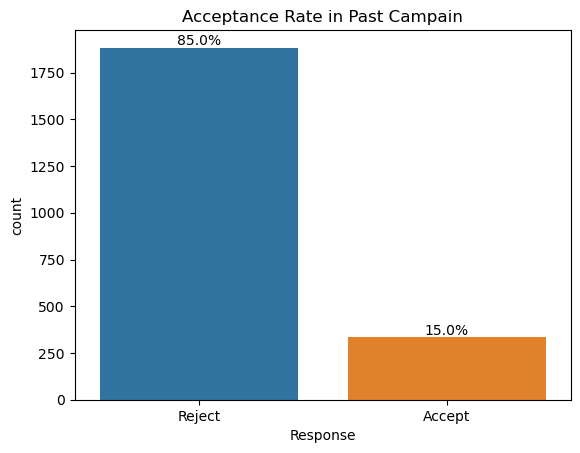

In [21]:
plt.title('Acceptance Rate in Past Campain')
g = sns.countplot(data = df, x = 'Response')
g.bar_label(g.containers[0], labels =label.values)
plt.xticks([0,1],['Reject','Accept']);

Only  15%  percent of customer accepted the campain in during the previous campain by supper store.

## Customer Education

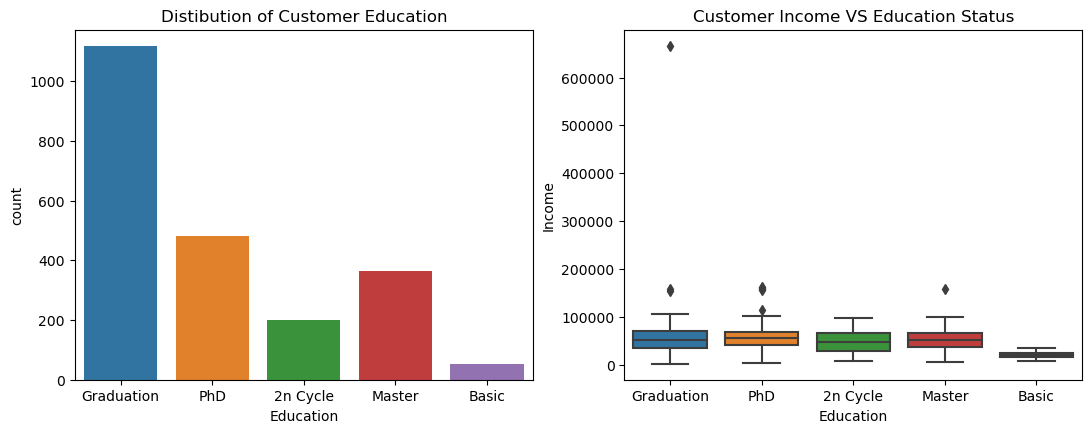

In [22]:
plt.figure(figsize = (13,10))
plt.subplot(221)
sns.countplot(data = df, x = 'Education')
plt.title('Distibution of Customer Education')

plt.subplot(222)
plt.title('Customer Income VS Education Status')
g = sns.boxplot(data = df, x = 'Education', y = 'Income');


A high proportion of customer educated, about 70% are higher education degree holders,we can see that the median salary of customer also correlate with education level. let clean up customer education, i will segment the education into three categories by replacing 2n Cycle  and Basic as undergrads, and the graduaction as graduate

In [23]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate",})

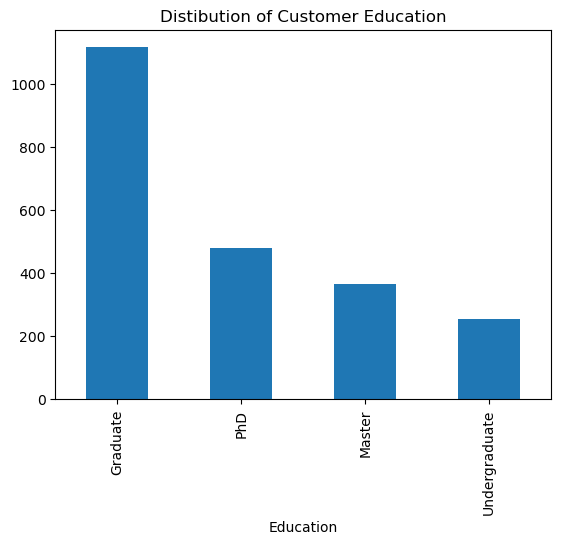

In [24]:
plt.title('Distibution of Customer Education')
df['Education'].value_counts().plot(kind = 'bar');

## Customer Marital Status

In [25]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

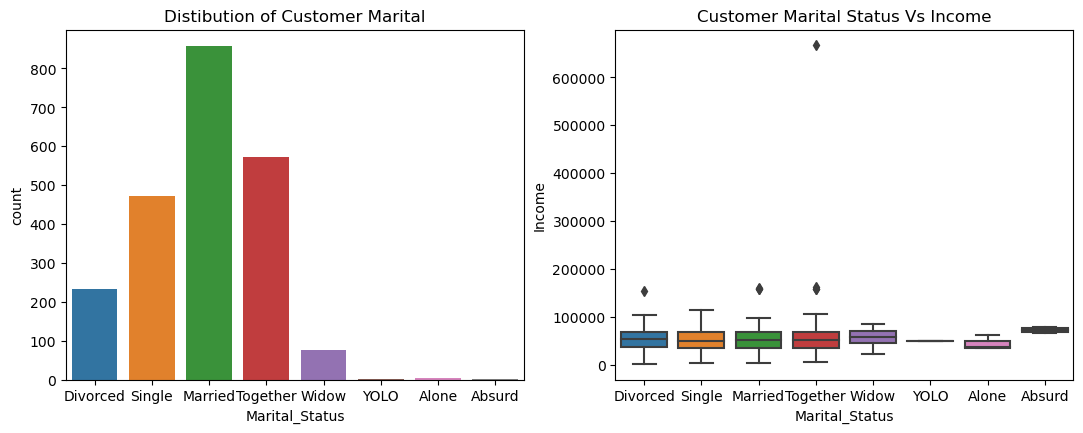

In [26]:
plt.figure(figsize = (13,10))
plt.subplot(221)
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Distibution of Customer Marital')

plt.subplot(222)
plt.title('Customer Marital Status Vs Income')
g = sns.boxplot(data = df, x = 'Marital_Status', y= 'Income');

A high number of customer are married, I will clean Marital status by replacing them with appropriate values

In [27]:

df["Marital_Status"]=df["Marital_Status"].replace({"Alone":"Single","YOLO":"Single", "Absurd":"Single",})

In [28]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64

## Customer Complaint

In [29]:
df['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

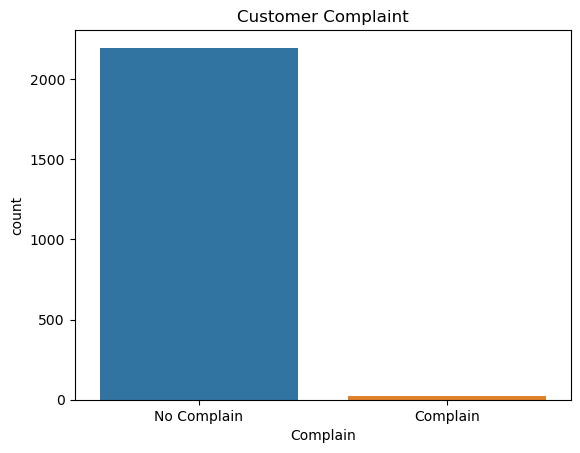

In [30]:
sns.countplot(data = df, x = 'Complain')

plt.xticks([0,1],['No Complain','Complain'])
plt.title('Customer Complaint');

A very small proportion of customer has complained on the services rendered by superstore 

## Purchase Channel Analysis

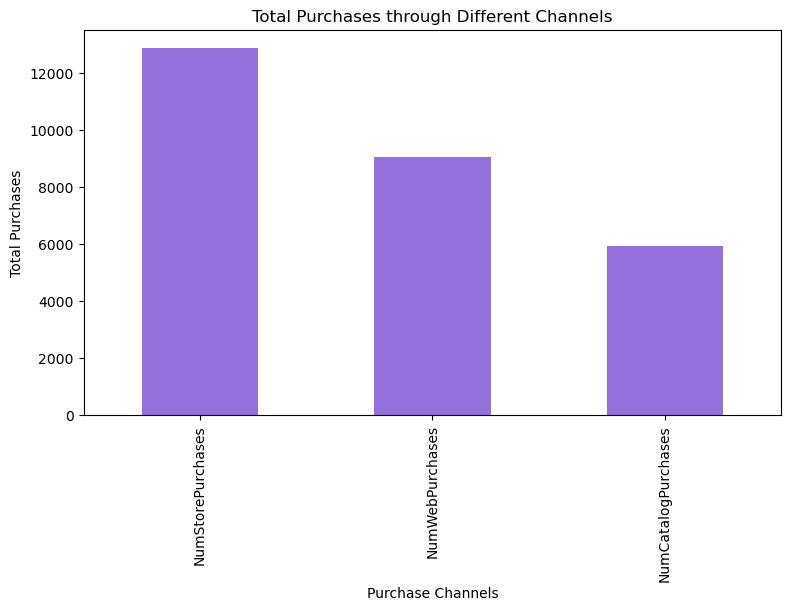

In [31]:
channels_columns = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
df[channels_columns].sum().plot(kind='bar', figsize=(9,5), color ='mediumpurple')
plt.title('Total Purchases through Different Channels')
plt.xlabel('Purchase Channels')
plt.ylabel('Total Purchases');

There is more purchase from store than web and catalogue

## Purchase Behaviour Analysis

In [32]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

C:\Users\GREATNESS\AppData\Local\Temp\ipykernel_10964\3919848532.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


''

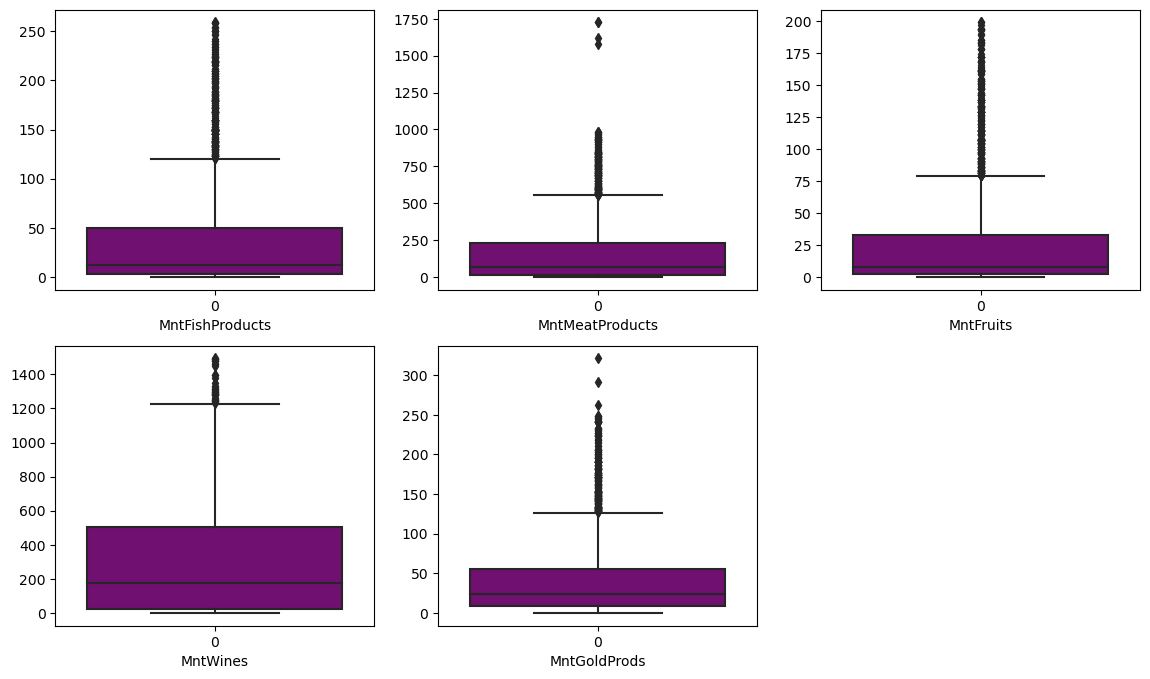

In [33]:
products_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines', 'MntGoldProds']
plt.figure(figsize = (14,8))
plt.title('Distribution of of Amount spent on Different Products')
for i , feature in enumerate(products_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data[feature], color = 'purple')
    plt.xlabel(feature)
;    

Customer spends more on whine  and meat products

In [34]:
df[products_columns].describe()

,MntFishProducts,MntMeatProducts,MntFruits,MntWines,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,37.637635,166.995939,26.356047,305.091606,43.965253
std,54.752082,224.283273,39.793917,337.327920,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,16.000000,2.000000,24.000000,9.000000
50%,12.000000,68.000000,8.000000,174.500000,24.500000
75%,50.000000,232.250000,33.000000,505.000000,56.000000
max,259.000000,1725.000000,199.000000,1493.000000,321.000000


Customers are spending more on Wine and meat products

## Recency Distribution

In [35]:
df['Recency'].describe()

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

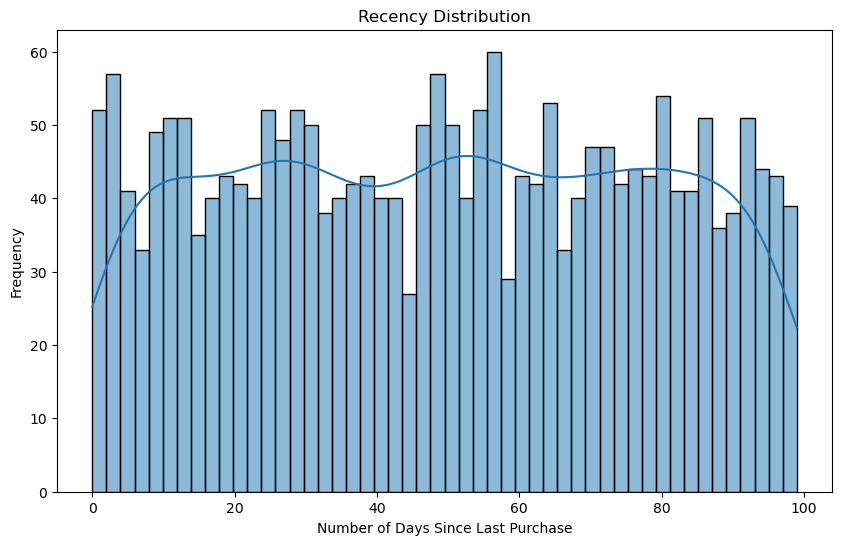

In [36]:
#Recency Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=50, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Number of Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

Customer have average recency of 49 days, that is most customer return to superstore after 49 days from their first purchase

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Feature Engineering</p>

### How long the customer has been enrolled ?

In [37]:
# the most recent customer enrolled
latest_enrolment = df['Dt_Customer'].max()
latest_enrolment 

Timestamp('2014-12-06 00:00:00')

In [38]:

df['Customer_enrol_days'] = (latest_enrolment - df['Dt_Customer']).dt.days

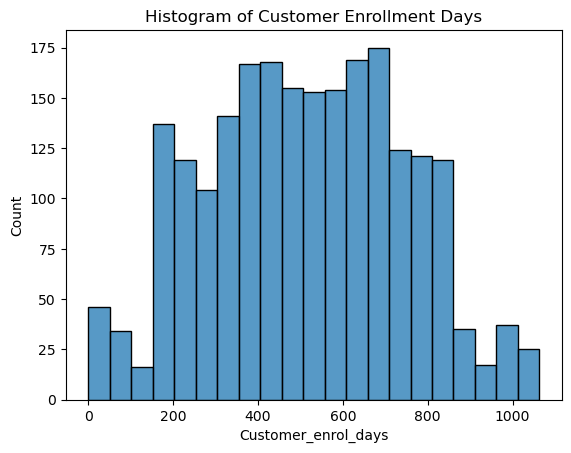

In [39]:
plt.title('Histogram of Customer Enrollment Days')
sns.histplot(df['Customer_enrol_days']);

There are few new customers, majority of customer have been enrolled 200 days prior to this analysis

### Customer age 

The year of birth of customer is given in the data, but it is more appropriate to use the customer age for analysis. therefore i will reference customer year bith to the year of this analysis to calculate the customer age.

In [40]:
# year of analysis
dt.date.today().year

<IPython.core.display.Javascript object>

2024

In [41]:
df['Dis_year'] = dt.date.today().year
df['customer_age'] = df['Dis_year']-df['Year_Birth']

<IPython.core.display.Javascript object>

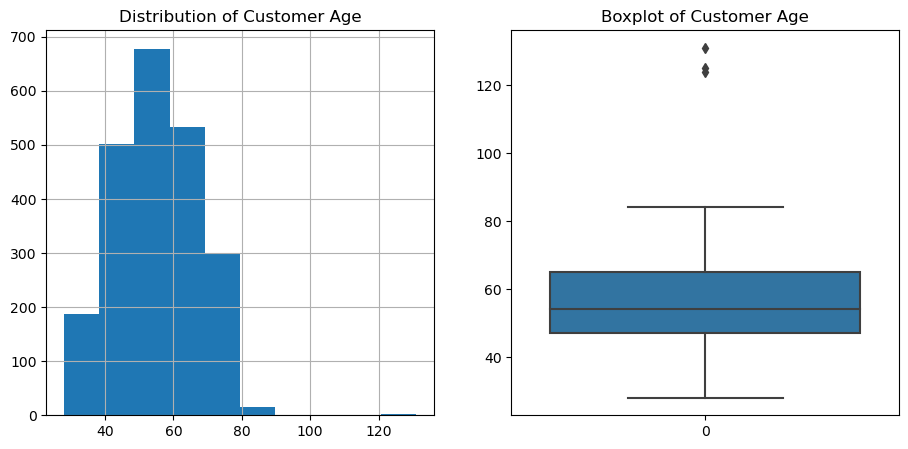

In [42]:
plt.figure(figsize = (11,5))
plt.subplot(121)
plt.title('Distribution of Customer Age')
df['customer_age'].hist()

plt.subplot(122)
plt.title('Boxplot of Customer Age')
sns.boxplot(df['customer_age'] );

As we can see, the oldest customer is 129 year, this is too old and we can see the outlier in the box plot, we will remove this outlier by taking customer age below 90 years

### Total Amount Spent On different Product

In [43]:
df['spent'] = df['MntFishProducts']+ df['MntMeatProducts'] + df['MntFruits']+ df['MntWines']+df['MntGoldProds']

### Total product orders

In [44]:
df['Total_Orders'] = df['NumDealsPurchases']+ df['NumWebPurchases'] +df['NumCatalogPurchases']+ df[ 'NumStorePurchases']

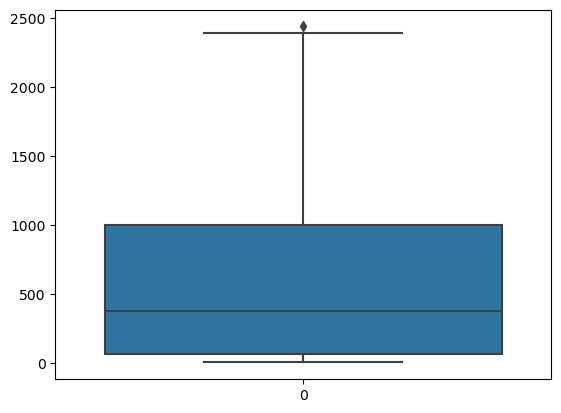

In [45]:
sns.boxplot(df['spent'] );

### Total number of Children 

In [46]:
df['Children'] = df['Kidhome'] + df['Teenhome']

### is the customer a parent ?

In [47]:
df['Is_Parent'] = np.where(df['Children']>0,1,0)

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 10px;">Data preparation and Preprocessing</p>

In this section, I will prepare and preprocess the data for clustering 

__The following Steps are applied to prepare and preprocess the data__:
  - Droping Irrelevant Columns 
  - Remove Outliers
  - Categorical feature encoding
  - Feature Scaling
  - Dimensionality reduction with PCA


In [59]:
# importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore') #ignore warning

In [49]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_enrol_days,Dis_year,customer_age,spent,Total_Orders,Children,Is_Parent
0,1826,1970,Graduate,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,173,2024,54,1001,15,0,0
1,1,1961,Graduate,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,174,2024,63,577,18,0,0
2,10476,1958,Graduate,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,207,2024,66,249,11,1,1
3,1386,1967,Graduate,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,31,2024,57,11,4,2,1
4,5371,1989,Graduate,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,124,2024,35,91,8,1,1


### Droping irrelevant columns

In [50]:
## drop irrelevant columns as per our business objective in the dataset,
df.drop(['Id','Year_Birth','Dt_Customer','Dis_year','Response'], axis =1, inplace = True)

In [51]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_enrol_days,customer_age,spent,Total_Orders,Children,Is_Parent
0,Graduate,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,173,54,1001,15,0,0
1,Graduate,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,174,63,577,18,0,0
2,Graduate,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,207,66,249,11,1,1
3,Graduate,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,31,57,11,4,2,1
4,Graduate,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,124,35,91,8,1,1


### Remove Outliers

In [52]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["customer_age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


### Categorical Feature Encoding

**Categorical Feature encoding**

In [53]:
df = pd.get_dummies(df,  drop_first = True, dtype = 'int')

### Feature Correlation Analysis

In [54]:
df.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_enrol_days,customer_age,spent,Total_Orders,Children,Is_Parent,Education_Master,Education_PhD,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.027900,-0.027892,0.199977,0.788443,0.670413,-0.343529,-0.403132,0.019802,0.101006,-0.169727,-0.008640,-0.023124,0.004369,0.039638
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.037067,-0.057731,-0.237497,-0.554263,-0.483980,0.688081,0.520355,0.013127,-0.042918,0.044254,0.018114,0.014984,0.009236,-0.071975
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,0.007746,0.008986,0.361932,-0.132103,0.132957,0.698199,0.587993,0.023177,0.093078,-0.108472,0.007612,-0.099601,0.026854,0.048137
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,0.005713,0.030748,0.015694,0.019536,0.007658,0.018062,0.002189,-0.026142,-0.007896,-0.007715,-0.019487,-0.001112,0.021239,-0.001413
MntWines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,-0.036420,0.148745,0.164615,0.902379,0.713520,-0.353356,-0.341994,0.036504,0.157988,-0.153558,-0.012810,-0.021200,0.004999,0.034590
MntFruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,-0.002956,0.059828,0.013447,0.596938,0.454582,-0.395161,-0.410657,-0.055426,-0.085349,-0.006054,-0.013626,0.012941,-0.015084,0.026294
MntMeatProducts,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,-0.021017,0.071381,0.033622,0.842654,0.565406,-0.504176,-0.574147,-0.008148,0.004440,-0.091836,-0.021757,0.040153,-0.002673,0.015395
MntFishProducts,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.019098,0.078042,0.041154,0.627074,0.468260,-0.427482,-0.449596,-0.049971,-0.105097,0.026699,-0.031689,0.014826,0.014594,0.042229
MntSweetProducts,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,-0.020569,0.076345,0.021516,0.560796,0.470420,-0.389152,-0.402064,-0.067505,-0.087014,0.026990,-0.005713,-0.001665,-0.012010,0.049689
MntGoldProds,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,0.053047,0.407873,0.441656,0.390693,-0.245973,-0.030166,0.145632,0.059779,0.523633,0.493199,-0.267776,-0.245380,-0.032134,-0.121404,-0.013413,-0.016613,0.000327,-0.011264,0.043529


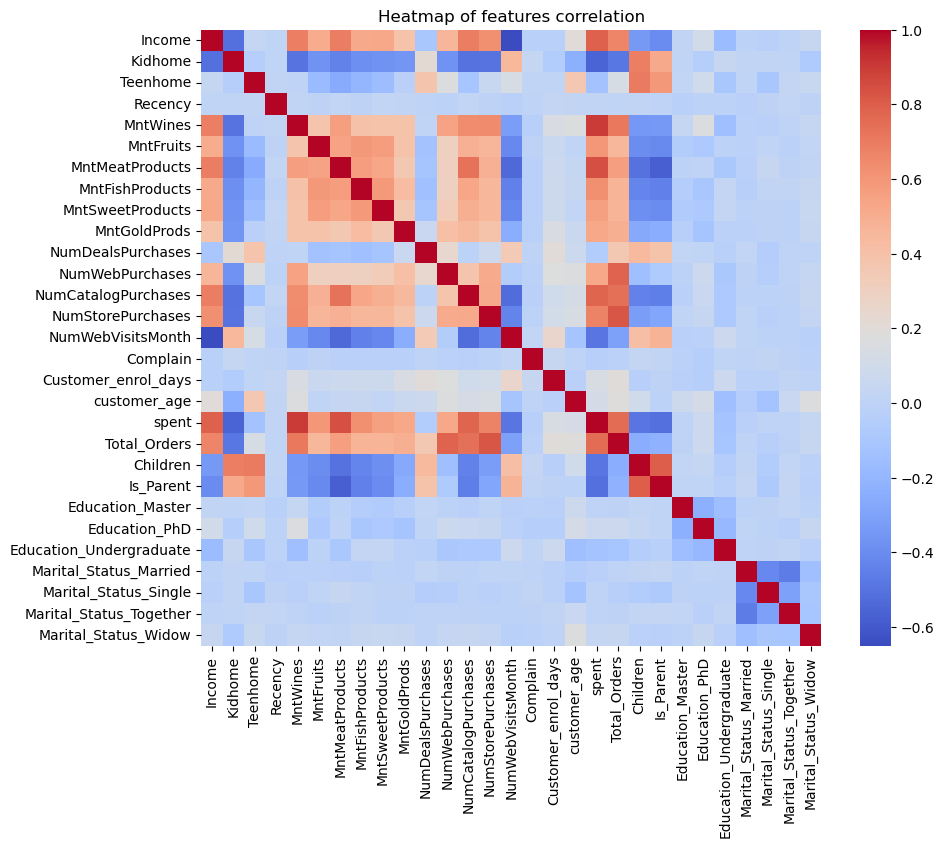

In [55]:
plt.figure(figsize = (10,8))
plt.title('Heatmap of features correlation')
sns.heatmap(data =df.corr(), cmap = 'coolwarm');

### __Feature scaling and dimensionality reduction using pipeline__ 
- Feature scaling helps to normalize the data to assume a Gussian distribution
- PCA is an unsupervised dimensionality reduction technique use to capture the most relevant feature for analysis. it help to handle multicolinearity and removes redundat feature that may impact our model negatively.

In [56]:
# i have pipe the preprocessing step and PCA using 3 componet of PCA
preprocessing_pipeline = Pipeline([
    ('Scalar', StandardScaler()),
    ('PCA', PCA(n_components = 3, random_state = 42))
            
])

# fit the preprocessing pipeline and safe in Scaled_df
Scaled_df = preprocessing_pipeline.fit_transform(df)

In [57]:
Scaled_df

array([[ 4.55617775, -2.35668825,  0.00666731],
       [ 0.97534559, -1.3212853 , -0.78124727],
       [-0.67991188, -0.07675216, -2.12551286],
       ...,
       [-1.52617984,  0.19066675,  1.71338786],
       [ 4.39106142, -1.76439715,  1.25516523],
       [ 2.13572651,  2.81756589,  0.22678766]])

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 10px;">Clustering</p>

## Kmeans Clustering

In order to achieve the objective of ths project which is to segment our customer into different cluster. I will employ Kmeans Clustering algorithms. Kmeans is a popular partiton clustering algorithm that has seen a vast application success in different field such as business, science and other fields such as medicine.

__The following steps are required in applying Kmeans__:
1. Determing the number of cluster: This step often require domain knowlegde to determine the number of optima cluster But many methods such as the elbow method has been developed to determine the optima value of cluster.
2. Fitting the model on the scaled dataset
3. Model evalution

### Determing the number of Cluster 

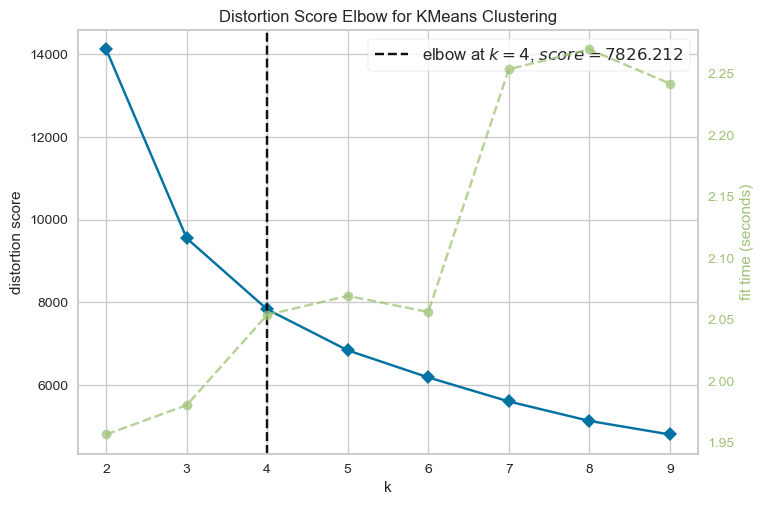

In [60]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(Scaled_df)
visualizer.show()
plt.show()

optimal value of Cluster(K= 4)

### Model Building 

In [61]:
model = KMeans(n_clusters = 4)
kmeans_cluster = model.fit(Scaled_df)
df3 =df.copy()
df['Customer_Cluster'] = kmeans_cluster.labels_ 

In [62]:
kmeans_cluster.labels_

array([2, 2, 0, ..., 3, 2, 1])

### Model Evaluation

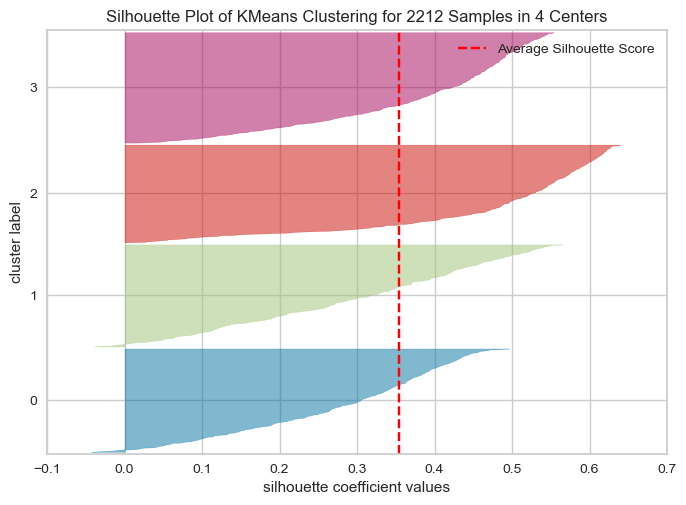

<Figure size 800x550 with 0 Axes>

In [63]:
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
visualizer.fit(Scaled_df)
visualizer.show()
plt.show()
plt.savefig('Silhouetteplot.png')

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 10px;">Cluster Analysis</p>

In this section we will explore the custers by checking their distribution, also comparing them in terms of income and spending 

''

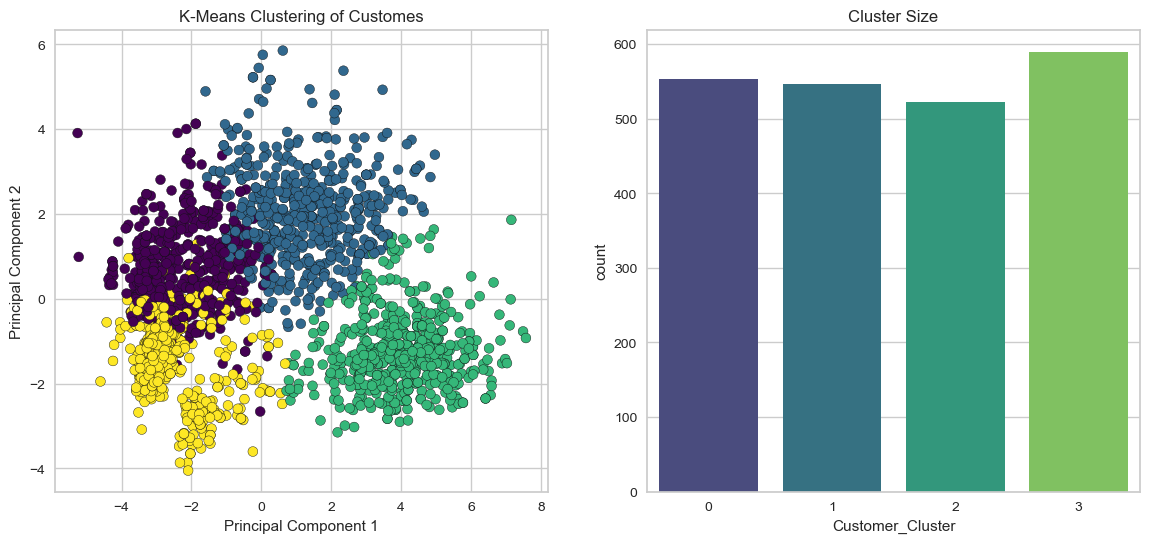

In [64]:
plt.figure(figsize=(14,6))

plt.subplot(121)
# Visualize the clusters
plt.scatter(Scaled_df[:, 0], Scaled_df[:, 1], c=kmeans_cluster.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering of Customes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.subplot(122)
plt.title('Cluster Size')
g=sns.countplot(data = df , x ='Customer_Cluster',palette='viridis')
;

__As we can see from the graph that the clusters are fairly distributed__

#### Let further explore by checking the feature that contibute more to 3 components of our PCA

In [65]:
df2 = df.copy()
df2.drop('Customer_Cluster',axis = 1, inplace = True)
scaler = StandardScaler()
scale_df = scaler.fit_transform(df2)

# Fit PCA to your data
pca = PCA(n_components=3)
pca.fit(scale_df)

# Get the principal components (eigenvectors) and explained variance ratio
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Display the dominant features for each principal component
num_features_to_display = 3  # You can adjust this number as needed

for i, pc in enumerate(components):
    print(f"Principal Component {i+1}:")
    sorted_indices = np.argsort(np.abs(pc))[::-1]  # Sort feature indices by absolute component values
    for j in range(num_features_to_display):
        feature_index = sorted_indices[j]
        feature_name = df.columns[feature_index]
        component_value = pc[feature_index]
        print(f"   {feature_name}: {component_value:.3f}")
    print(f"Explained Variance Ratio: {explained_variance_ratio[i]:.3f}")
    print()


Principal Component 1:
   spent: 0.320
   Income: 0.285
   NumCatalogPurchases: 0.282
Explained Variance Ratio: 0.293

Principal Component 2:
   Teenhome: 0.453
   NumDealsPurchases: 0.407
   Children: 0.355
Explained Variance Ratio: 0.102

Principal Component 3:
   Customer_enrol_days: 0.417
   customer_age: -0.397
   Education_Undergraduate: 0.332
Explained Variance Ratio: 0.057



__We can infer that amount spent by customer, income, number of catalogue purchases, if the customer has children and time of enrollment at superstore serves a feature signature in the component that distinguished the customer.__

### Cluster Income and Spending Comparism

<Axes: xlabel='Customer_Cluster', ylabel='NumCatalogPurchases'>

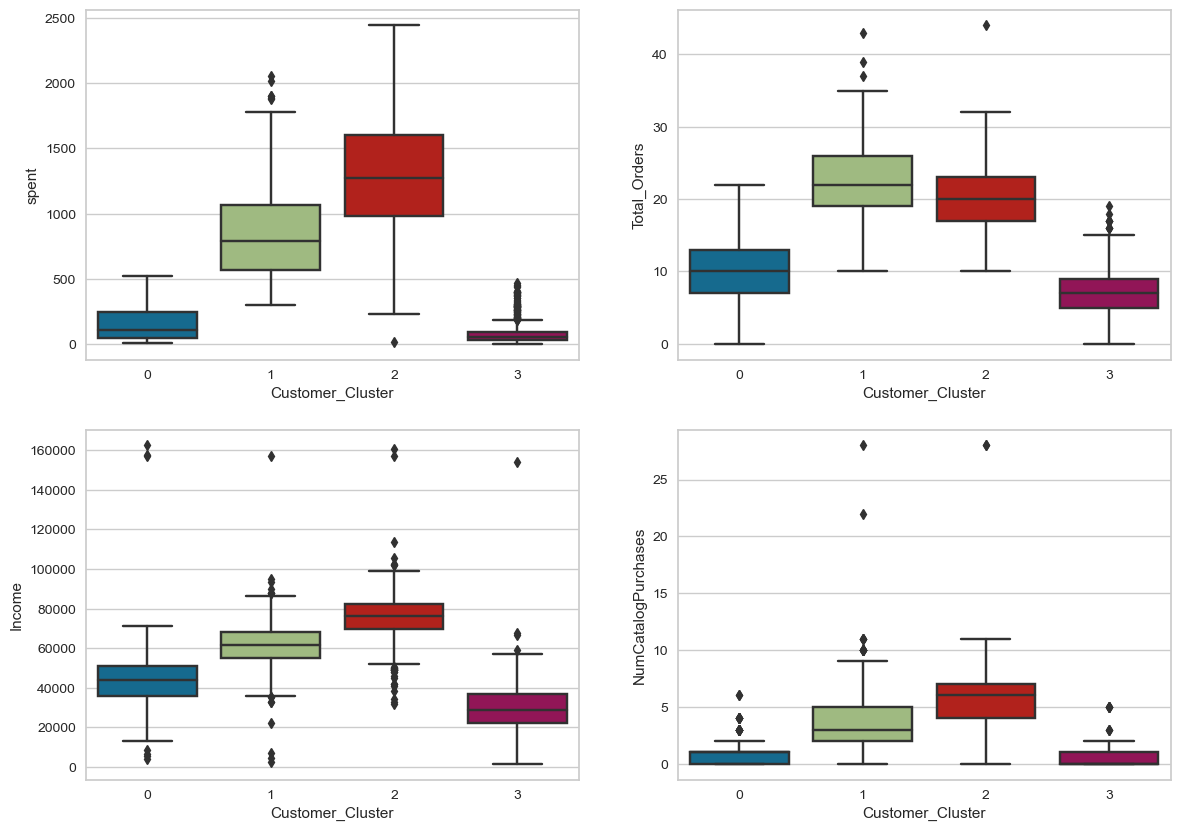

In [66]:
plt.figure(figsize=(14,10))

plt.subplot(221)
sns.boxplot(data = df, x = 'Customer_Cluster', y = 'spent')
plt.subplot(222)
sns.boxplot(data = df, x = 'Customer_Cluster', y = 'Total_Orders')
plt.subplot(223)
sns.boxplot(data = df, x = 'Customer_Cluster', y = 'Income')
plt.subplot(224)
sns.boxplot(data = df, x = 'Customer_Cluster', y = 'NumCatalogPurchases')

**The plot above shows the clusters pattern**
* Cluster 0: high spending & high income
* Cluster 1: low spending  & lower income
* Cluster 2: Average Spending & Average income 
* Cluster 3: low spending & low income  

Cluster 0 are the whales follow by cluster 2

<a id=""></a>
# <p style="background-color:#32435f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:5px 10px;">Inference and Conclusion</p>

Based on the analysis several key insights and conclusions can be drawn:

1. **Income and Spending Patterns**: The statistical summary reveals that the average income of customers is approximately $52k. Customers tend to spend more on wine and meat products, indicating potential areas for targeted marketing campaigns.

2. **Purchase Behavior**: A significant portion of purchases are made in-store compared to web and catalog purchases. This suggests that the store's physical presence plays a crucial role in customer engagement and sales.

3. **Customer Acceptance Rate**: Only 15% of customers accepted the campaign during the previous campaign period. This indicates the need for refining marketing strategies to improve campaign effectiveness and customer engagement.

4. **Education Level and Income**: A correlation between education level and income is observed, with higher education degree holders having higher median salaries. This highlights the importance of education in shaping customers' purchasing power.

5. **Marital Status and Complaints**: A majority of customers are married, and only a small proportion have complained about the services provided by the store. This suggests overall satisfaction with the store's offerings and services.

6. **Recency of Purchases**: The average recency of customer purchases is approximately 49 days, indicating a relatively short turnaround time between purchases. This suggests a loyal customer base that regularly returns to the store for purchases.

7. **Cluster Analysis**: The clustering algorithm identified four distinct customer segments based on features such as income, spending behavior, number of purchases, presence of children, and enrollment period.

8. **Inferences from Clusters**:
   - Cluster 0: High spending and high-income customers, potentially representing high-value customers or "whales."
   - Cluster 1: Low spending and lower-income customers, indicating price-sensitive or budget-conscious shoppers.
   - Cluster 2: Customers with average spending and average income, representing a balanced segment.
   - Cluster 3: Low spending and low-income customers, potentially representing a segment that requires targeted promotions or incentives.

In conclusion, the analysis provides valuable insights into customer behavior, preferences, and demographics, which can inform strategic decision-making in marketing and promotional efforts. By understanding customer segments and their unique characteristics, retail store can tailor its marketing strategies to effectively target and engage different customer groups, ultimately leading to improved customer satisfaction and business success.

`Job Moses Ubeh`